In [81]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [82]:
# 2. Đọc file dữ liệu và chia train test validate theo tỉ lệ 6:3:1
df = pd.read_csv('/content/HSG-Historical-Data.csv', sep=",")
df=df['Price']

df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index
df = df.str.replace(',', '').astype(float)

# Split the data into training, testing, and validation sets
train_size = int(0.8 * len(df))
test_size = int(0.2 * len(df))

train_data = df[:train_size]
test_data = df[train_size:]

In [83]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data)
# Convert y_train to numeric, removing commas and handling potential errors

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [84]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data)
y_pred = model.predict(x_test)

In [85]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[16676.08793358 16672.64429886 16669.20066415 16665.75702944
 16662.31339472 16658.86976001 16655.4261253  16651.98249058
 16648.53885587 16645.09522116 16641.65158645 16638.20795173
 16634.76431702 16631.32068231 16627.87704759 16624.43341288
 16620.98977817 16617.54614345 16614.10250874 16610.65887403
 16607.21523932 16603.7716046  16600.32796989 16596.88433518
 16593.44070046 16589.99706575 16586.55343104 16583.10979632
 16579.66616161 16576.2225269 ]


In [86]:
# 7. Đánh giá độ chính xác thuật toán
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

#MAPE
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('Testing MAPE:', test_mape)

#MAE
test_mae = np.mean(np.abs(y_pred - y_test))
print('Testing MAE:', test_mae)

Testing RMSE: 11622.902440076408
Testing MAPE: 212.6044695004931
Testing MAE: 11608.37699325539


In [87]:
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+90, step=1)

# Create an array of 90 consecutive integers starting from last_index
x_next_90_days = np.array(range(last_index+1, last_index+91)).reshape(-1, 1)

# Predict the closing prices for the next 90 days
y_next_90_days = model.predict(x_next_90_days)

# Print the predicted closing prices for the next 90 days
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

Predicted closing prices for the next 90 days:
[16676.08793358 16672.64429886 16669.20066415 16665.75702944
 16662.31339472 16658.86976001 16655.4261253  16651.98249058
 16648.53885587 16645.09522116 16641.65158645 16638.20795173
 16634.76431702 16631.32068231 16627.87704759 16624.43341288
 16620.98977817 16617.54614345 16614.10250874 16610.65887403
 16607.21523932 16603.7716046  16600.32796989 16596.88433518
 16593.44070046 16589.99706575 16586.55343104 16583.10979632
 16579.66616161 16576.2225269  16572.77889219 16569.33525747
 16565.89162276 16562.44798805 16559.00435333 16555.56071862
 16552.11708391 16548.67344919 16545.22981448 16541.78617977
 16538.34254506 16534.89891034 16531.45527563 16528.01164092
 16524.5680062  16521.12437149 16517.68073678 16514.23710206
 16510.79346735 16507.34983264 16503.90619793 16500.46256321
 16497.0189285  16493.57529379 16490.13165907 16486.68802436
 16483.24438965 16479.80075494 16476.35712022 16472.91348551
 16469.4698508  16466.02621608 16462.5

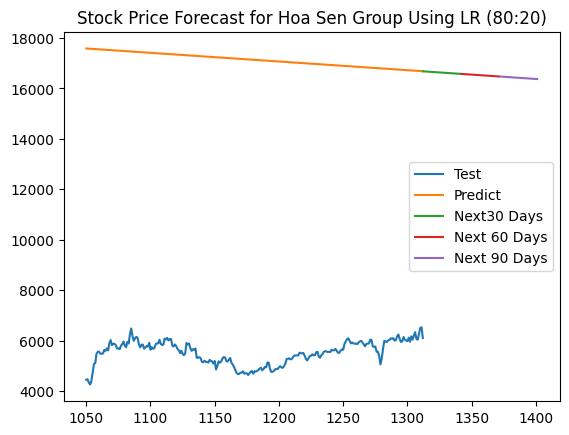

In [88]:
# 8.Vẽ hình
plt.plot(test_data.index, test_data)
plt.plot(test_data.index, y_pred)
plt.plot(range(last_data.start, last_data.start + 30), y_next_90_days[:30])
plt.plot(range(last_data.start+30, last_data.start + 60), y_next_90_days[30:60])
plt.plot(range(last_data.start+60, last_data.start + 90), y_next_90_days[60:90])
plt.legend(['Test', 'Predict','Next30 Days', "Next 60 Days", "Next 90 Days"])
plt.title("Stock Price Forecast for Hoa Sen Group Using LR (80:20)")
plt.show()

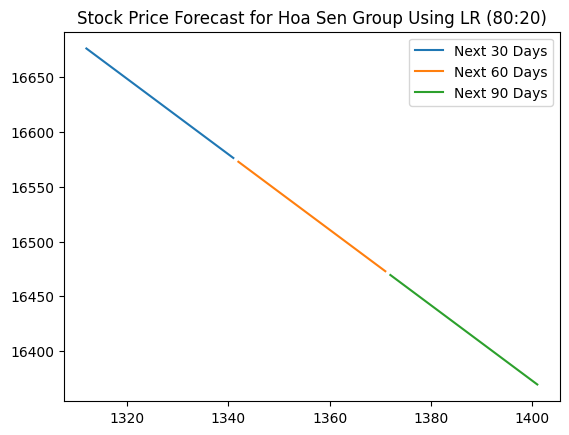

In [89]:
plt.plot(range(last_data.start, last_data.start + 30), y_next_90_days[:30])
plt.plot(range(last_data.start+30, last_data.start + 60), y_next_90_days[30:60]) # Slice y_next_90_days to match x-axis dimensions
plt.plot(range(last_data.start+60, last_data.start + 90), y_next_90_days[60:90])
plt.legend(["Next 30 Days", "Next 60 Days", "Next 90 Days"])
plt.title("Stock Price Forecast for Hoa Sen Group Using LR (80:20)")
plt.show()